In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from discretize import discretize

In [11]:
plt.rcParams['figure.figsize'] = [5, 5]

In [12]:
data = pd.read_excel('./dataset.xls')

In [13]:
data.drop('Unnamed: 0', axis = 1, inplace = True)


In [14]:
# data = data.iloc[: , 1:]

In [15]:
data

,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255.0,2016-01-04,2016-05-24
1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45.0,2016-01-04,2016-11-02
2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,NaN,2016-01-06,2016-12-07
3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054.0,2016-01-06,2016-09-11
4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180.0,2016-01-07,2016-01-31
...,...,...,...,...,...,...,...,...,...
7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,In Progress,GTX Basic,590.0,2018-12-30,2019-07-22
7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,In Progress,MG Advanced,3284.0,2018-12-30,2019-05-26
7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Pro,300.0,2018-12-31,2019-04-15
7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,In Progress,MG Special,3284.0,2018-12-31,2019-05-16


In [16]:
data.isna().sum()

Customer                0
Agent                   0
SalesAgentEmailID       0
ContactEmailID          0
Stage                   0
Product                 0
Close_Value          1208
Created Date            0
Close Date              0
dtype: int64

In [17]:
# fill na values with mean
close_value_mean =data['Close_Value'].mean()
data['Close_Value'].fillna(close_value_mean, inplace = True)

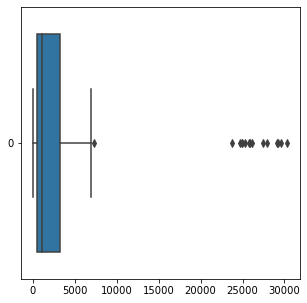

In [18]:
ax = sns.boxplot(data=data['Close_Value'], orient="h")

In [19]:
#precentage
data['Product'].value_counts(normalize=True)

GTX Basic         0.211538
MG Special        0.187692
GTXPro            0.167821
MG Advanced       0.160513
GTX Plus Basic    0.157051
GTX Plus Pro      0.110513
GTK 500           0.004872
Name: Product, dtype: float64

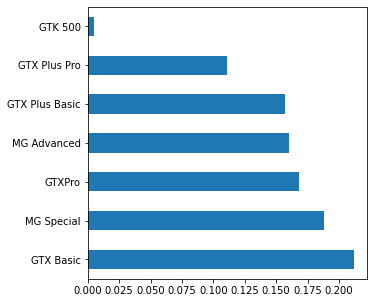

In [20]:
data['Product'].value_counts(normalize=True).plot.barh()

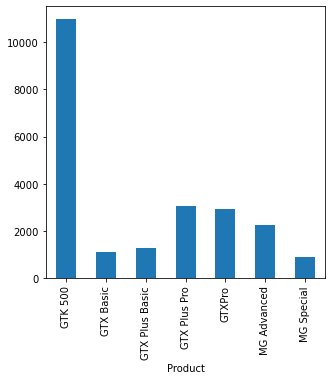

In [21]:
data.groupby('Product')['Close_Value'].mean().plot.bar()
plt.show()

In [22]:
# data['Stage'] = data['Stage'].astype('category')
# data.dtypes

In [23]:
discretize(data)



In [24]:
data

,Customer,Agent,SalesAgentEmailID,ContactEmailID,Stage,Product,Close_Value,Created Date,Close Date
0,Konex,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,1,GTX Plus Basic,1255.000000,2016-01-04,2016-05-24
1,Finjob,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,1,MG Special,45.000000,2016-01-04,2016-11-02
2,Kinnamplus,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,-1,MG Special,1852.915504,2016-01-06,2016-12-07
3,Genco Pura Olive Oil Company,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,0,MG Advanced,1054.000000,2016-01-06,2016-09-11
4,Stanredtax,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,1,MG Advanced,3180.000000,2016-01-07,2016-01-31
...,...,...,...,...,...,...,...,...,...
7795,Vehement Capital Partners,Jonathan Berthelot,jonathan@piedpiper.com,lavonia@vehementcapitalpartners.com,0,GTX Basic,590.000000,2018-12-30,2019-07-22
7796,Hottechi,Marty Freudenburg,marty@piedpiper.com,juliette@hottechi.com,0,MG Advanced,3284.000000,2018-12-30,2019-05-26
7797,Umbrella Corporation,Anna Snelling,anna@piedpiper.com,orpha@umbrellacorporation.com,0,GTX Plus Pro,300.000000,2018-12-31,2019-04-15
7798,Rundofase,Gladys Colclough,gladys@piedpiper.com,crista@rundofase.com,0,MG Special,3284.000000,2018-12-31,2019-05-16


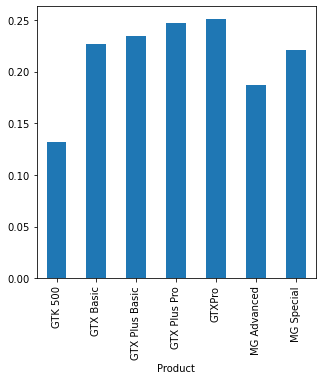

In [25]:
data.groupby('Product')['Stage'].mean().plot.bar()

In [26]:
result = pd.pivot_table(data=data, index='Agent', columns='Product',values='Stage')
result

Product,GTK 500,GTX Basic,GTX Plus Basic,GTX Plus Pro,GTXPro,MG Advanced,MG Special
Agent,,,,,,,
Anna Snelling,NaN,0.210526,0.234043,0.137931,NaN,-0.017241,0.310734
Boris Faz,NaN,0.125000,0.235294,0.151515,0.346154,0.192308,0.294118
Cassey Cress,NaN,0.215385,0.192982,0.210526,0.465517,0.138889,0.285714
Cecily Lampkin,NaN,0.304348,0.423077,0.259259,NaN,0.250000,0.183673
Corliss Cosme,-1.000000,0.187500,0.156863,0.375000,0.355932,-0.068966,0.190476
Daniell Hammack,NaN,0.136364,0.246154,0.257143,0.287879,-0.115385,0.076923
Darcel Schlecht,-1.000000,0.290323,0.297030,0.262295,0.183230,0.191176,0.215686
Donn Cantrell,NaN,0.266667,0.142857,0.142857,0.096774,0.317073,-0.250000
Elease Gluck,0.055556,0.454545,0.428571,-0.571429,0.307692,0.160000,0.229508


In [34]:
plt.rcParams['figure.figsize'] = [10, 10]

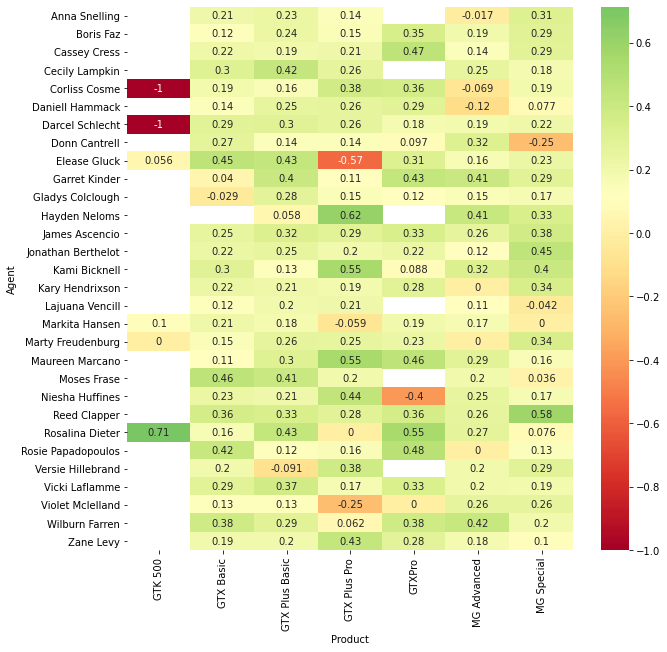

In [35]:
sns.heatmap(result, annot=True, cmap = 'RdYlGn', center=0.117 )
plt.show()

In [28]:
sorted(list(data[data['Product']=='GTK 500'][data['Stage'] == 'Won']['Close_Value']) , reverse=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
<ipython-input-28-49ca812657ac>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sorted(list(data[data['Product']=='GTK 500'][data['Stage'] == 'Won']['Close_Value']) , reverse=True)


[]